## Import Libraries

In [3]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('..')
from utils.plot import *

## Load the dataset

In [6]:
# Load testing data
data = pd.read_csv('https://raw.githubusercontent.com/ktxdev/mind-matters/refs/heads/master/data/raw/test.csv')

## Initial Exploration
### Shape and Structure

In [7]:
print(data.shape)
data.head()

(93800, 19)


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


### Dropping Unwanted Features
- **id:** This is just a unique identifier for each person in the dataset, which does not contribute to predicting mental health outcomes.
- **Name:** This feature is not relevant to predicting depression and could introduce noise i.e it does not provide meaningful information for the model

In [8]:
data.drop(columns=['id', 'Name'], inplace=True)

### Rename columns

In [10]:
data.rename(columns={'Have you ever had suicidal thoughts ?': 'Had Suicidal Thoughts?'}, inplace=True)

## Data Types

In [11]:
data.dtypes

Gender                               object
Age                                 float64
City                                 object
Working Professional or Student      object
Profession                           object
Academic Pressure                   float64
Work Pressure                       float64
CGPA                                float64
Study Satisfaction                  float64
Job Satisfaction                    float64
Sleep Duration                       object
Dietary Habits                       object
Degree                               object
Had Suicidal Thoughts?               object
Work/Study Hours                    float64
Financial Stress                    float64
Family History of Mental Illness     object
dtype: object

## Data Types Conversion

In [12]:
data['Study Satisfaction'] = data['Study Satisfaction'].astype('category')
data['Job Satisfaction'] = data['Job Satisfaction'].astype('category')
data['Academic Pressure'] = data['Academic Pressure'].astype('category')
data['Work Pressure'] = data['Work Pressure'].astype('category')
data['Financial Stress'] = data['Financial Stress'].astype('category')
data['Work/Study Hours'] = data['Work/Study Hours'].astype('category')

## Checking for Missing Values

In [13]:
missing_values_cols = data.isnull()
print('Missing value counts:\n')
print(missing_values_cols.sum()[missing_values_cols.sum() > 0])
print('\nMissing value percentages:\n')
print(round((missing_values_cols.mean()[missing_values_cols.mean() > 0]) * 100, 2))

Missing value counts:

Profession            24632
Academic Pressure     75033
Work Pressure         18778
CGPA                  75034
Study Satisfaction    75033
Job Satisfaction      18774
Dietary Habits            5
Degree                    2
dtype: int64

Missing value percentages:

Profession            26.26
Academic Pressure     79.99
Work Pressure         20.02
CGPA                  79.99
Study Satisfaction    79.99
Job Satisfaction      20.01
Dietary Habits         0.01
Degree                 0.00
dtype: float64


### Descriptive Statistics
#### Continuous Variables

In [16]:
data.describe()

,Age,CGPA
count,93800.000000,18766.000000
mean,40.321685,7.674016
std,12.393480,1.465056
min,18.000000,5.030000
25%,29.000000,6.330000
50%,42.000000,7.800000
75%,51.000000,8.940000
max,60.000000,10.000000


**Insights:**
- The age distribution closely aligns with that observed in the training dataset, indicating consistency across samples
- Similar to the training dataset, CGPA data is available for only a subset of the population, likely reflecting the portion representing students
- The CGPA median is comparable to that in the training dataset, suggesting similar academic performance levels across the samples

In [17]:
categorical_variables = ['Gender', 'City', 'Working Professional or Student', 'Study Satisfaction',
                         'Job Satisfaction', 'Academic Pressure', 'Work Pressure', 'Work/Study Hours',
                         'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Financial Stress',
                         'Had Suicidal Thoughts?', 'Family History of Mental Illness']
data[categorical_variables].describe()

,Gender,City,Working Professional or Student,Study Satisfaction,Job Satisfaction,Academic Pressure,Work Pressure,Work/Study Hours,Profession,Sleep Duration,Dietary Habits,Degree,Financial Stress,Had Suicidal Thoughts?,Family History of Mental Illness
count,93800,93800,93800,18767.0,75026.0,18767.0,75022.0,93800.0,69168,93800,93795,93798,93800.0,93800,93800
unique,2,68,2,5.0,5.0,5.0,5.0,13.0,64,31,22,87,5.0,2,2
top,Male,Kalyan,Working Professional,4.0,2.0,3.0,2.0,10.0,Teacher,Less than 5 hours,Moderate,Class 12,2.0,No,No
freq,51262,4387,75028,4175.0,16971.0,4930.0,16255.0,9450.0,16385,25661,33018,9812,21151.0,47375,47118


**Insights:**

- **Gender:** The dataset has 93,800 entries for gender, with two categories (presumably Male and Female). The most frequent gender is Male, with 51,262 entries, indicating a gender imbalance similar to that in the training dataset.

- **City:** There are 68 unique cities, with "Kalyan" being the most common, appearing 4,387 times. This suggests a wide geographical representation, though certain cities, like Kalyan, have a higher concentration.

- **Working Professional or Student:** The dataset includes two categories, "Working Professional" and "Student." The majority are Working Professionals, with 75,028 entries, which aligns with the training dataset's focus on working individuals.

- **Study Satisfaction:** This attribute has five satisfaction levels, with Level 4 being the most common (4,171 entries). Data is available for a subset (18,767 entries), likely only for students, as observed in the training dataset.

- **Job Satisfaction:** Five job satisfaction levels are recorded, with Level 2 (16,971 entries) being the most common, suggesting moderate job dissatisfaction among working professionals, consistent with the training set. Data is available for 75,026 entries, aligning with the working professional group.

- **Academic Pressure:** The dataset includes five levels of academic pressure, with Level 3 (4,930 entries) being the most frequent, indicating moderate academic pressure for students. This attribute is limited to the student group (18,767 entries), as in the training dataset.

- **Work Pressure:** Five levels of work pressure are present, with Level 2 (16,255 entries) as the most frequent, suggesting moderate work pressure among working professionals, consistent with the training data. This attribute applies primarily to the working professional subset (75,022 entries).

- **Work/Study Hours:** There are 13 unique values for work/study hours, with 10 hours being the most common (9,450 entries), suggesting that long hours are prevalent in this sample population.

- **Profession:** The dataset includes 64 unique professions, with "Teacher" as the most common (16,385 entries), indicating a high representation of educators.

- **Sleep Duration:** The dataset records 31 unique sleep durations, with "Less than 5 hours" being the most frequent (25,661 entries), highlighting a trend of short sleep duration among participants.

- **Dietary Habits:** There are 22 unique dietary categories, with "Moderate" being the most common (33,018 entries), indicating that most individuals report average or balanced dietary habits.

- **Degree:** The dataset has 87 unique educational qualifications, with "Class 12" being the most common (9,812 entries), suggesting a significant portion of participants have completed secondary education.

- **Financial Stress:** Financial stress has five levels, with Level 2 being the most common (21,151 entries), indicating moderate financial stress, similar to the training dataset.

- **Had Suicidal Thoughts?:** This attribute has two responses, "Yes" and "No." "No" is the most frequent response (47,375 entries), suggesting that about half of the respondents reported no suicidal thoughts, similar to the training set.

- **Family History of Mental Illness:** Two responses, "Yes" and "No," are recorded for family history of mental illness. The most common response is "No" (47,118 entries), indicating that the majority do not have a known family history of mental illness.

## Univariate Analysis
### Age

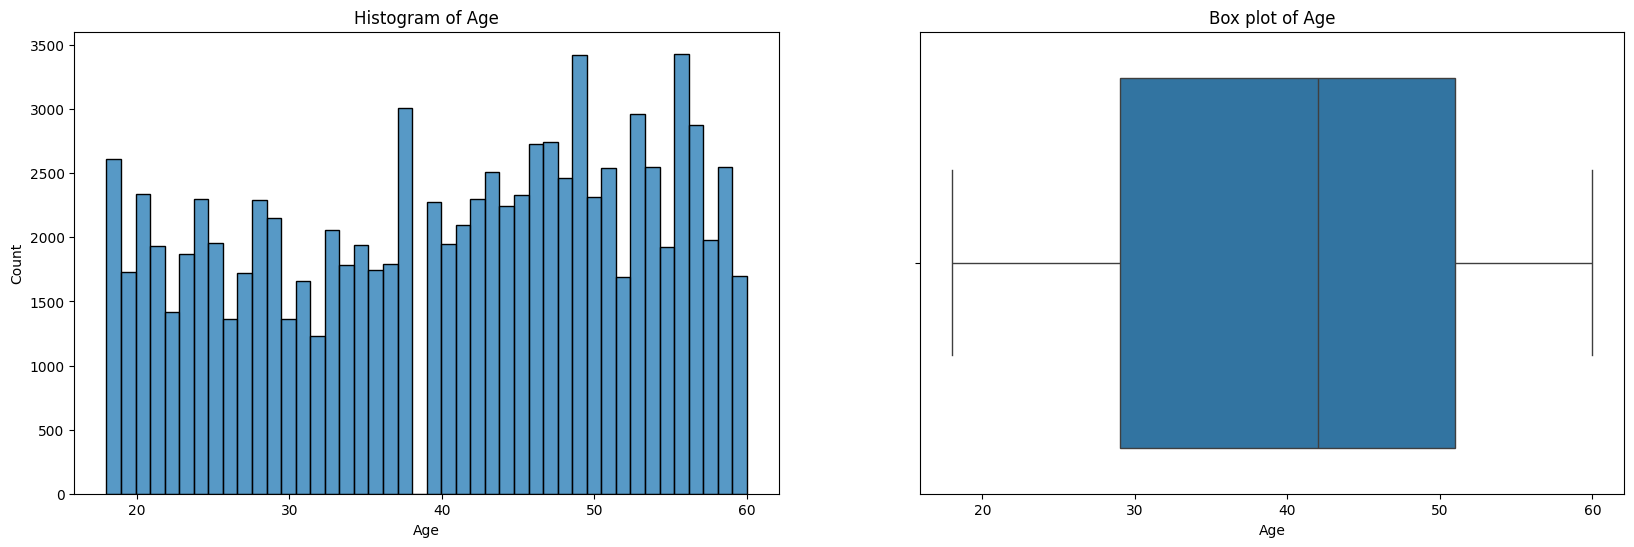

In [18]:
plot_numerical(data, 'Age')

#### Insights:
- **Histogram:**
    - The age distribution in the test set appears fairly consistent, with relatively uniform counts across different age groups
    - Ages span from around 18 to 60, without any single age group dominating the dataset, which suggests a broad age range and diversity
    - Peaks are visible around the ages of 20 and 50, similar to the training set, indicating these age groups might be more represented
    - This distribution suggests a good mix of younger and older adults, making the test set comparable to the training set.
- **Box Plot:**
    - The median age is around the early 40s, similar to the training set, indicating that half of the population is below this age and half is above
    - The interquartile range (IQR) falls between approximately 30 and 50 years, indicating that most of the data lies within this age range
    - No outliers are observed beyond the whiskers, indicating a well-contained age range from 18 to 60, similar to the training data

### CGPA

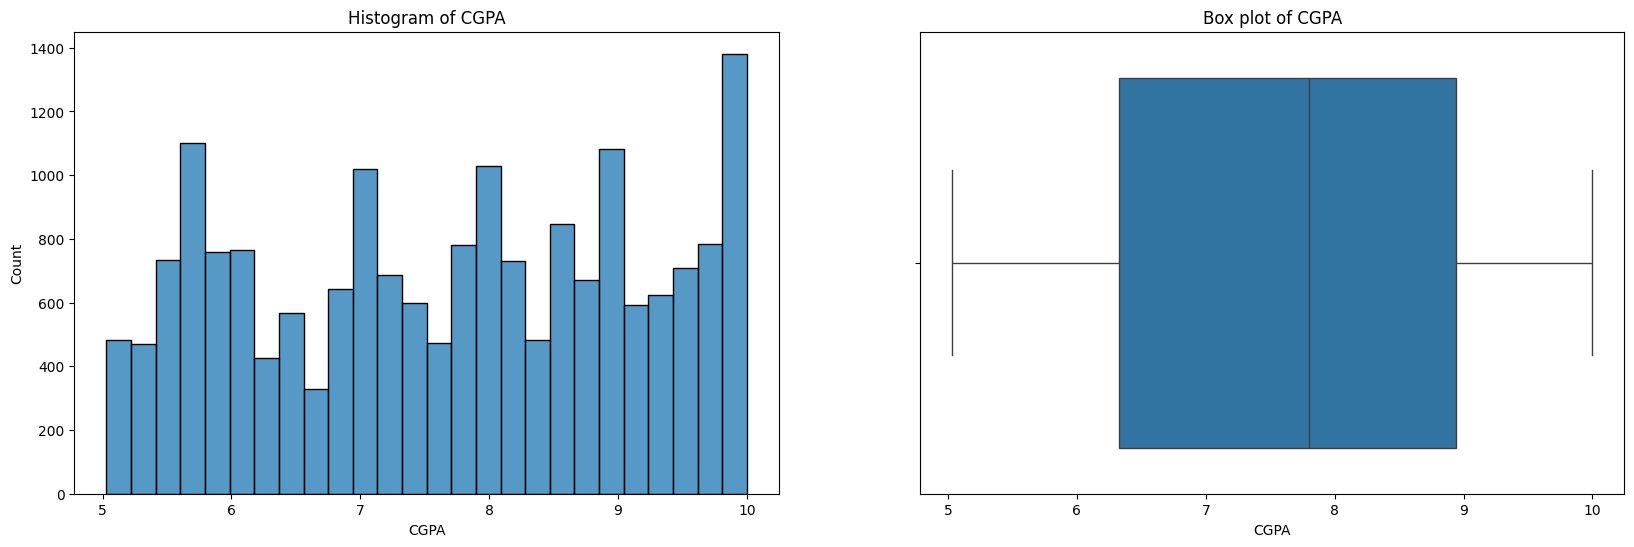

In [19]:
plot_numerical(data, 'CGPA')

#### Insights:
- **Histogram:**
    - The CGPA distribution in the test set spans from 5.0 to 10.0, similar to the training set, showing a wide range of academic performance
    - Peaks are visible around CGPA values of 6.0, 7.0, and 10.0, with the highest frequency at CGPA 10.0. This suggests that, as in the training set, a notable portion of students achieve high scores, possibly due to a grading cap
    - The distribution reflects diverse academic performance levels, with a slightly higher concentration of students at both lower (around 6.0) and upper (around 10.0) ends
- **Box Plot:**
    - The median CGPA is around 7.8, consistent with the training set, suggesting that half of the students score below and half score above this point
    - The interquartile range (IQR) covers approximately 6.3 to 8.9, indicating that the middle 50% of CGPA scores fall within this range
    - The distribution has well-contained whiskers, with CGPA values spanning from about 5.0 to 10.0, and no apparent outliers, as seen in the training dataset

### Gender

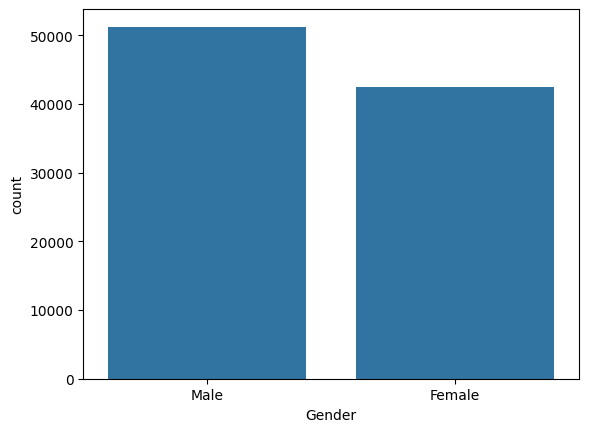

<Figure size 1000x600 with 0 Axes>

In [21]:
plot_categorical(data, 'Gender')

#### Insights:
- The Gender attribute in the test set has two categories: Male and Female
- Males are slightly more frequent than females, with a noticeable but not extreme imbalance, similar to the training set. This indicates that the test set also has a higher representation of males

### City

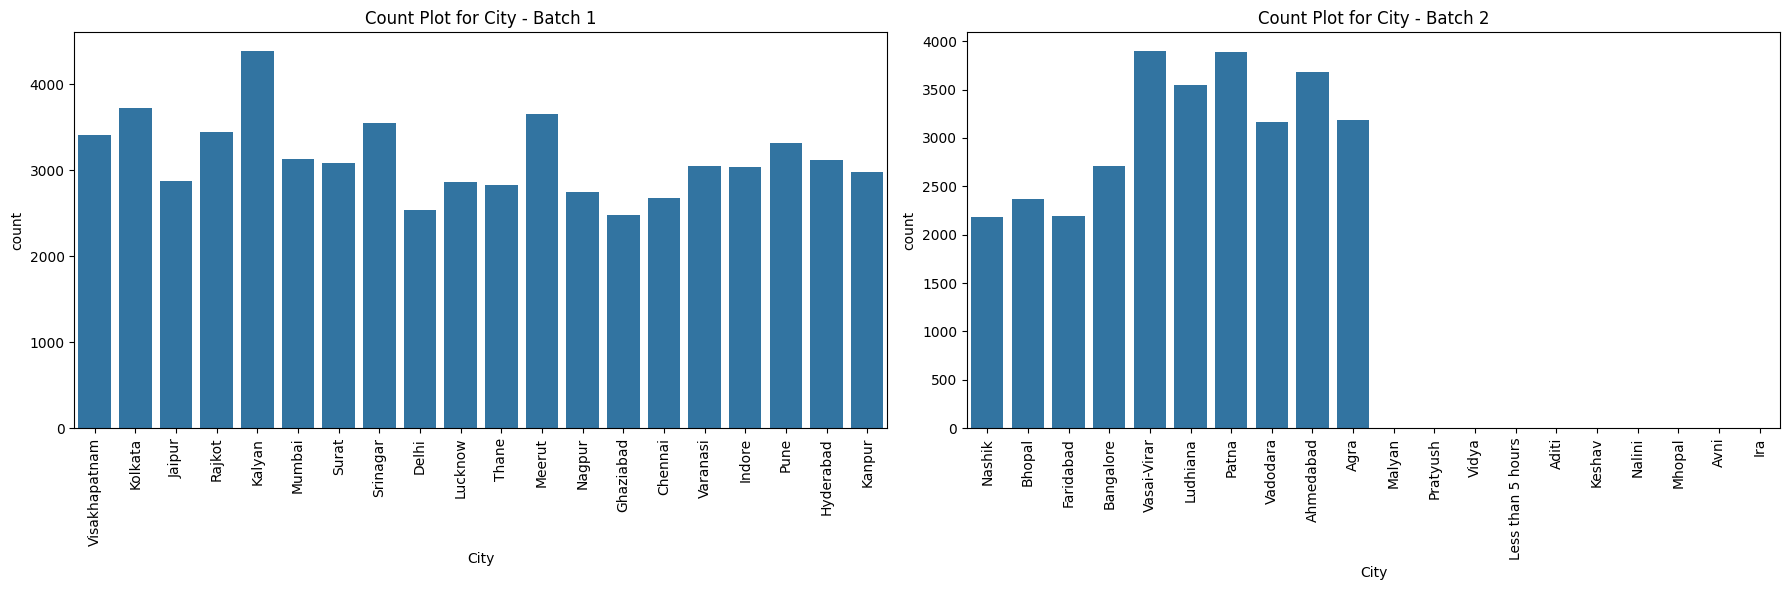

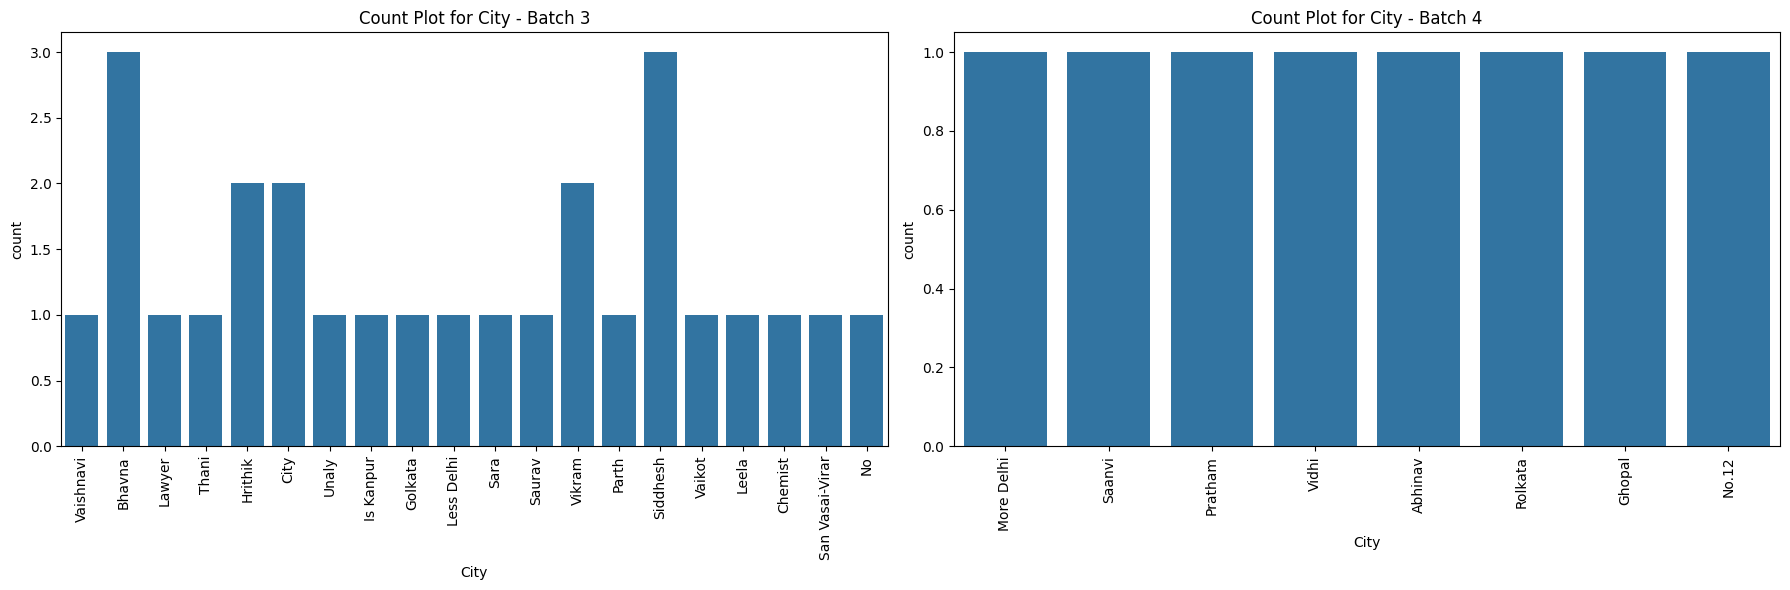

In [22]:
plot_categorical(data, 'City')

#### Insights:
- Similar to the training set, the test set shows a concentration of high representation in major cities while smaller cities or unusual entries have minimal counts. This indicates an urban-centric dataset but with inconsistencies in labeling
- The presence of non-city entries in Batches 3 and 4, such as individual names or ambiguous terms, suggests potential data quality issues in the City attribute

### Working Professional or Student

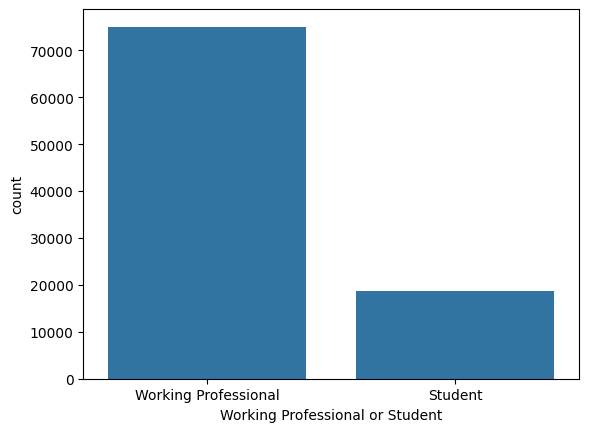

<Figure size 1000x600 with 0 Axes>

In [24]:
plot_categorical(data, 'Working Professional or Student')

### Insights:
- The Working Professional or Student attribute in the test set has two categories: Working Professional and Student
- Working Professionals are the majority, with a count significantly higher than that of Students. The count for working professionals is over 70,000, while students represent a much smaller portion, likely around 20,000
- This distribution is similar to the training set, maintaining a composition of approximately 80% working professionals and 20% students

### Study Satisfaction

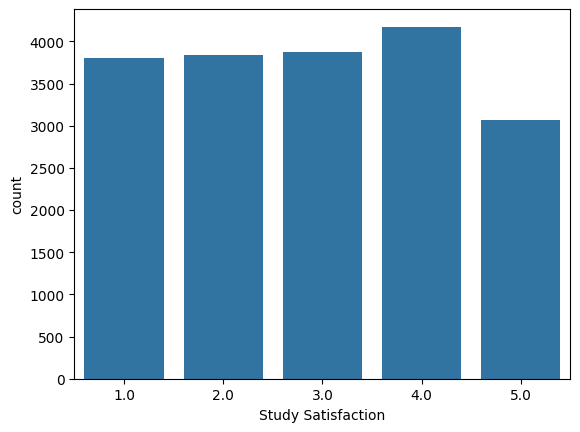

<Figure size 1000x600 with 0 Axes>

In [25]:
plot_categorical(data, 'Study Satisfaction')

#### Insights:
- The Study Satisfaction attribute includes five levels, ranging from 1 (lowest) to 5 (highest)
- Satisfaction levels 2, 3, and 4 have similar frequencies, each around 4,000, indicating that a substantial portion of students report moderate satisfaction with their studies
- Level 5 has the lowest count, showing that fewer students report the highest level of study satisfaction
- Level 1 also has a slightly lower count compared to the middle levels, suggesting fewer students experience extreme dissatisfaction.

### Job Satisfaction

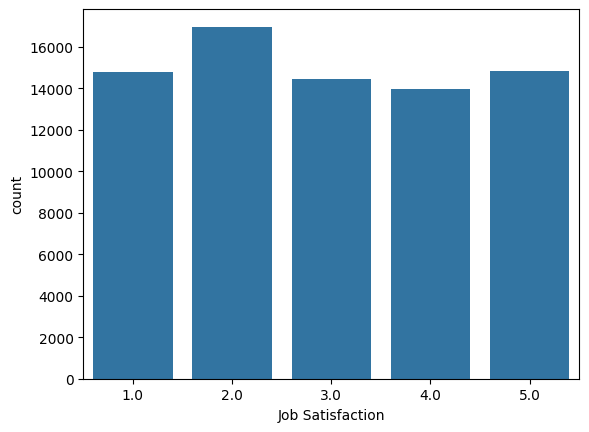

<Figure size 1000x600 with 0 Axes>

In [26]:
plot_categorical(data, 'Job Satisfaction')

#### Insights:
- The Job Satisfaction attribute in the test set includes five levels, from 1 (lowest) to 5 (highest)
- Level 2 has the highest count, around 16,000 entries, suggesting that a notable portion of individuals report relatively low job satisfaction
- Levels 1, 3, 4, and 5 have relatively balanced counts, each with around 14,000 to 15,000 entries, showing a fairly even distribution across these satisfaction levels.

### Academic Pressure

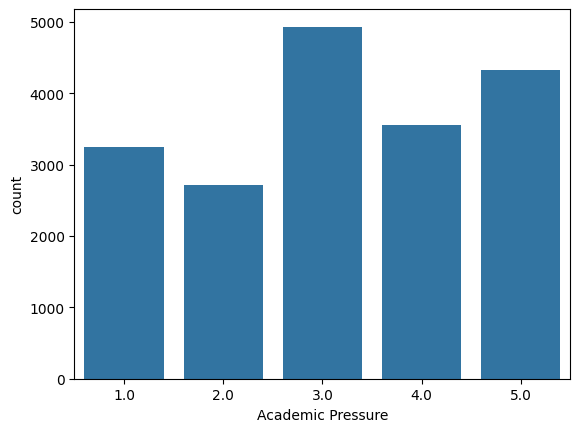

<Figure size 1000x600 with 0 Axes>

In [27]:
plot_categorical(data, 'Academic Pressure')

#### Insights:
- The Academic Pressure attribute includes five levels, from 1 (low pressure) to 5 (high pressure)
- Level 3 has the highest count, with approximately 5,000 entries, indicating that moderate academic pressure is the most common experience among students in the test set
- Levels 1, 4, and 5 have similar counts, each around 3,000 to 4,000, indicating a balanced spread across low to high academic pressure
- Level 2 has the lowest count, similar to the training set, suggesting that slightly low academic pressure is less common

### Work Pressure

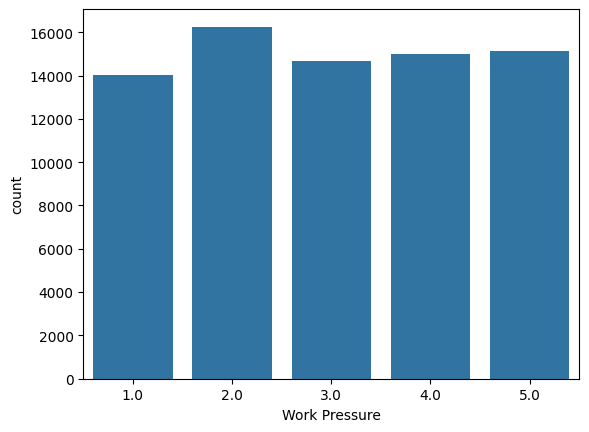

<Figure size 1000x600 with 0 Axes>

In [28]:
plot_categorical(data, 'Work Pressure')

#### Insights:
- The Work Pressure attribute in the test set includes five levels, from 1 (low pressure) to 5 (high pressure)
- Level 2 has the highest count, close to 16,000 entries, indicating that moderate work pressure is a common experience among individuals in the test set
- The other levels (1, 3, 4, and 5) each have counts between 14,000 and 15,000, showing a fairly balanced distribution across different levels of work pressure

### Profession

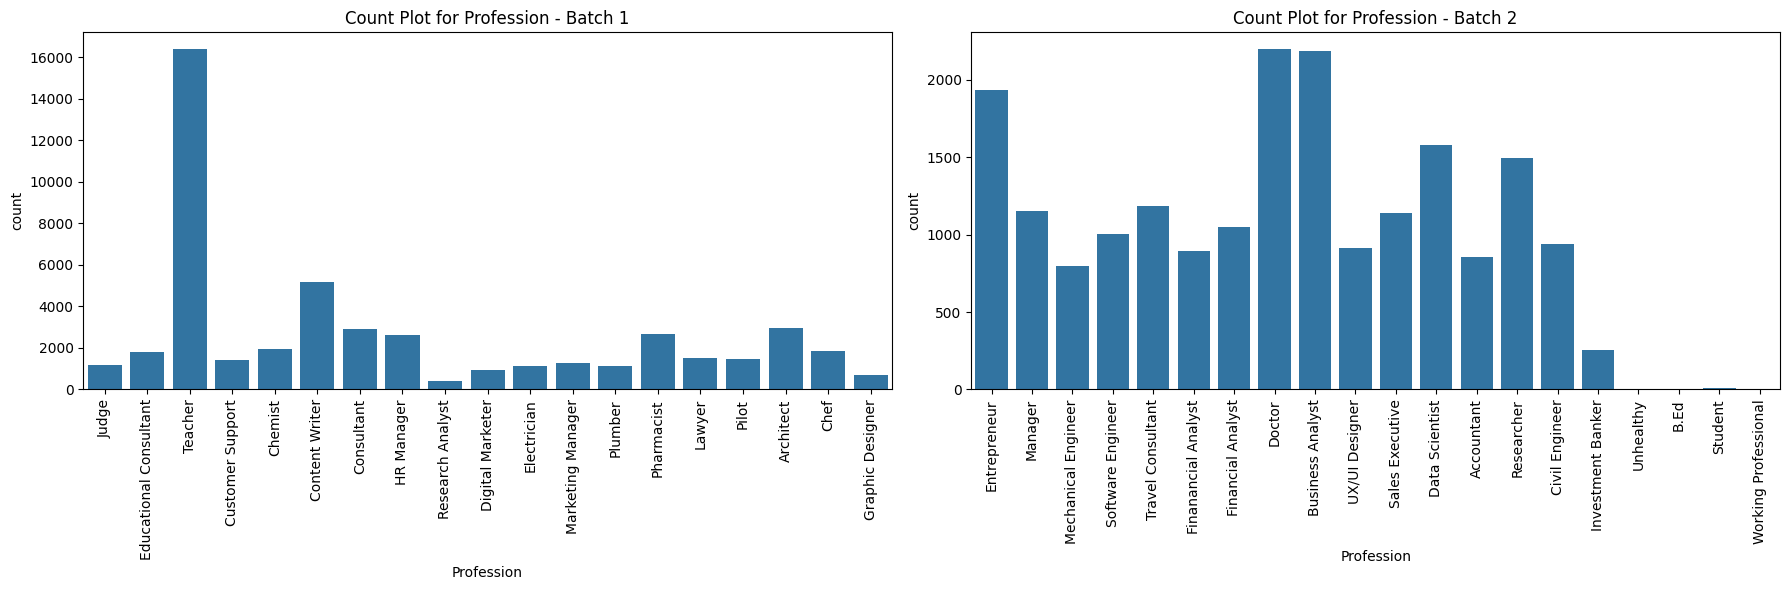

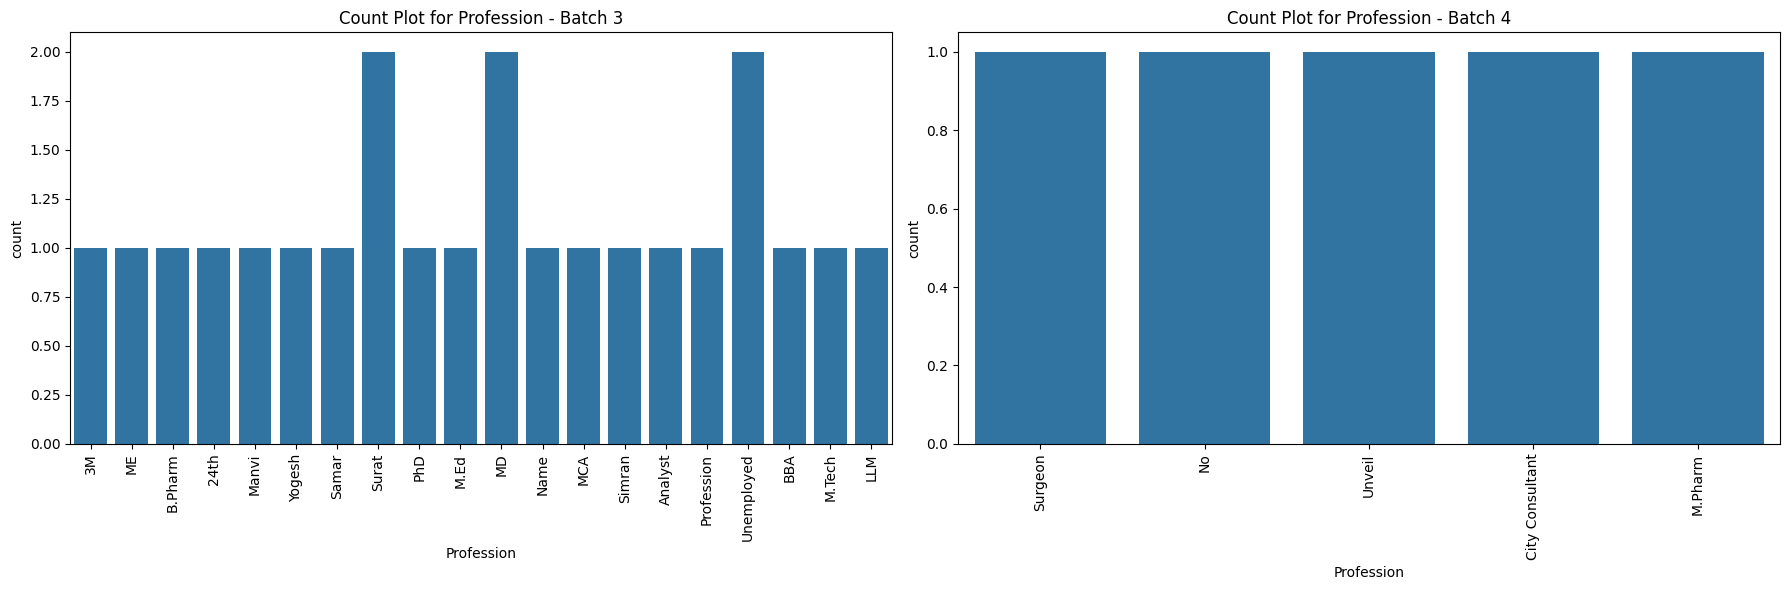

In [29]:
plot_categorical(data, 'Profession')

#### Insights:
- The test set, like the training set, shows a significant imbalance with some professions, particularly Teachers and Doctors, being heavily represented, while others have minimal or inconsistent entries
- The presence of non-professional entries, such as names, degrees, or ambiguous terms (e.g., Unwell, 24th), suggests inconsistencies in the Profession attribute
- Despite data inconsistencies, the test set includes a broad array of professional fields, covering education, healthcare, corporate, technical, and support roles

### Sleep Duration

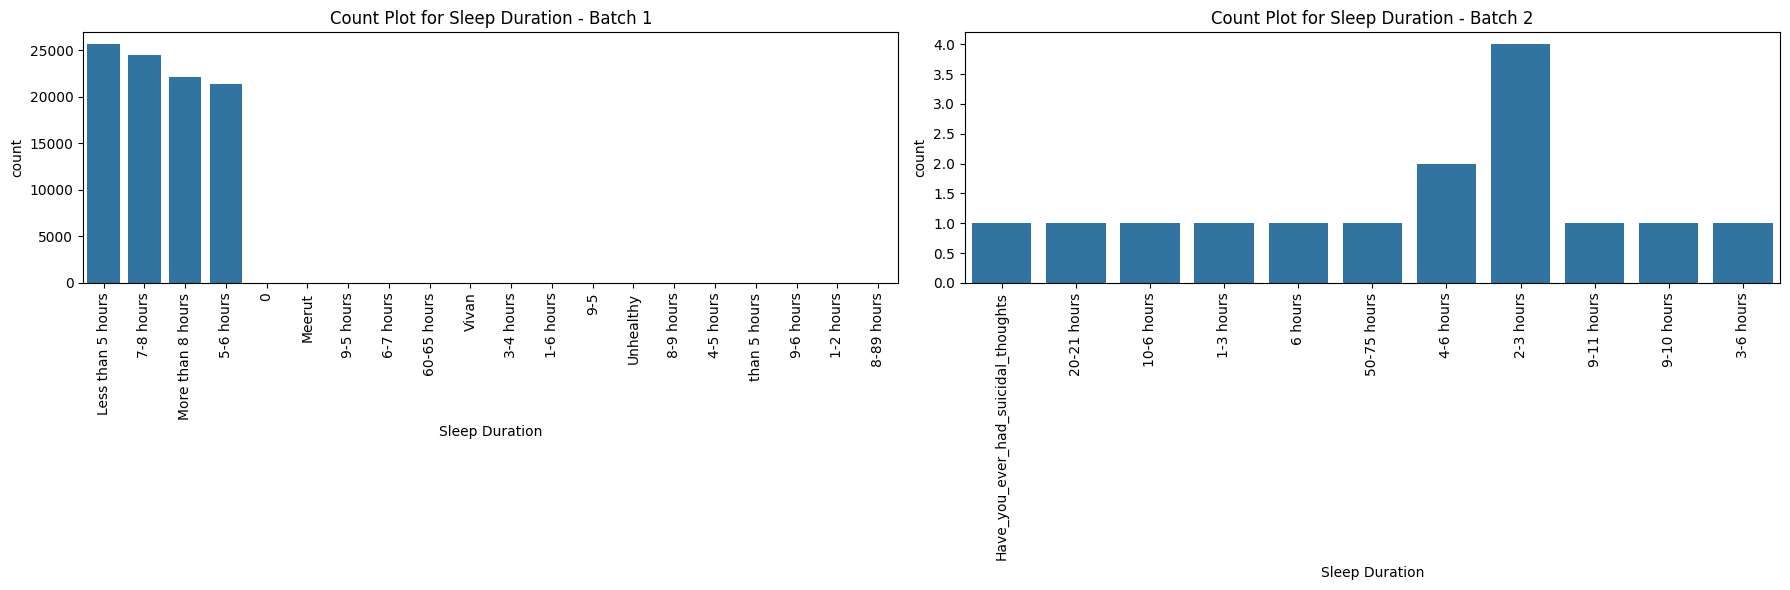

In [31]:
plot_categorical(data, 'Sleep Duration')

#### Insights:
- As in the training set, there is a trend toward shorter sleep durations in the test set, with most individuals reporting less than 5 hours of sleep
- The presence of entries that do not correspond to valid sleep durations (e.g., city names, unrelated questions) suggests data quality issues that need to be addressed

### Dietary Habits

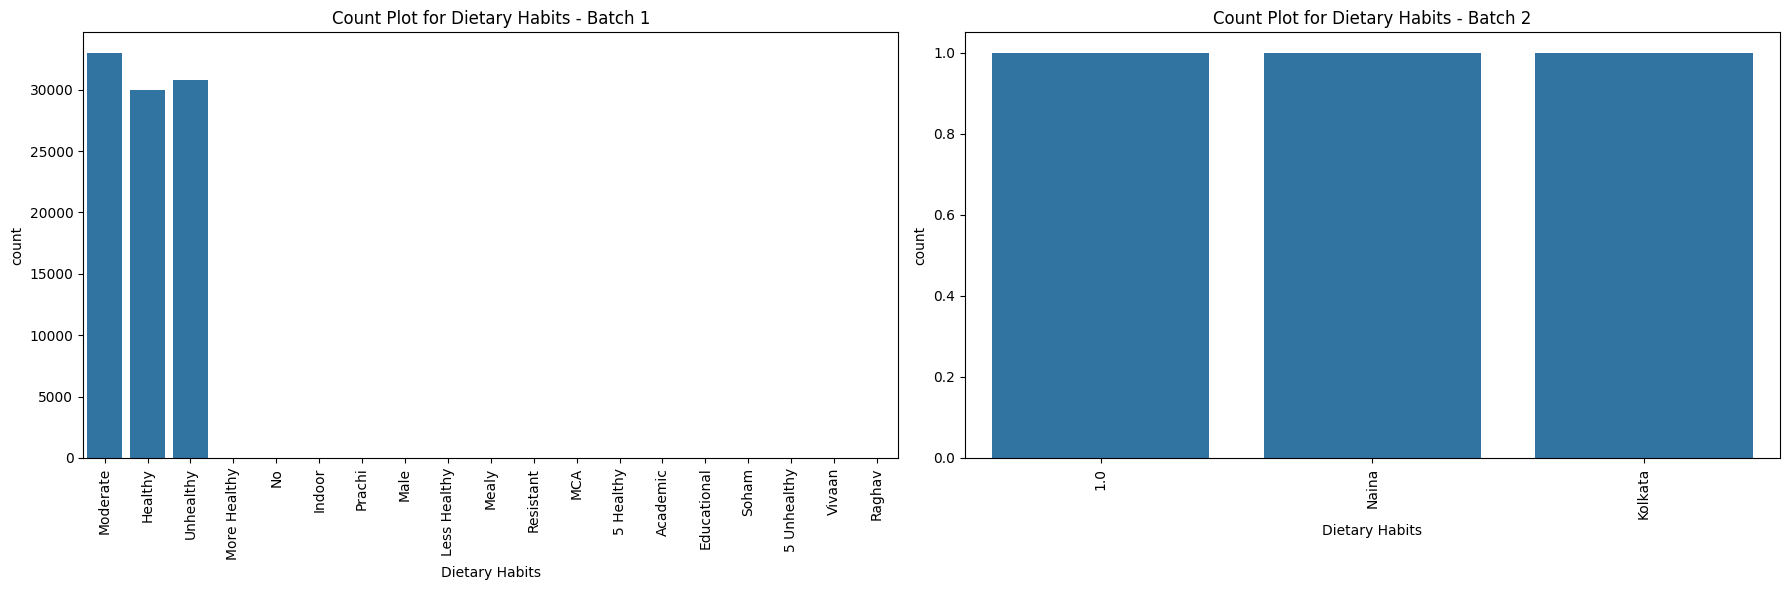

In [32]:
plot_categorical(data, 'Dietary Habits')

#### Insights:
- Similar to the training set, Healthy, Unhealthy, and Moderate are the main dietary categories, suggesting these are accurately representative of the dietary habits in the sample population
- The inclusion of non-dietary-related entries indicates potential data entry errors